# **Naive Bayes Clasiffier :**

## **Import library dan Dataset**




In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sentiment.csv')
df.head()

,Date,Replied To,Thread Title,Post Content,Post Clean,Sentiment
0,14-11-2019 09:54,beritafilistin,Perekam Wanita di Kamar Ganti Baju Mall Kerap ...,Dia pasti alumni 212,alumni 212,Neutral
1,01-10-2019 17:38,ibelindua,Gubernur Anies Sampaikan Ancaman Penggantian I...,Gak pernah ngaca ya,ngaca,Neutral
2,28-09-2019 10:56,matadewa909,"Kecewa Ponakan Prabowo Batal Baca Doa, Gerindr...",Alumni 212 mana suaranya,alumni 212 suaranya,Neutral
3,17-09-2019 12:41,SENORITA88,"Pria India Bikin Helm Pakai AC, Kepala Dingin ...",Malah masuk angin ntar,masuk angin ntar,Negative
4,28-08-2019 13:45,matthysse76,"Jokograd & Mandalanusa, Usulan Nama Ibu Kota B...",Wowoland city of kamprets,wowoland city of kamprets,Neutral


In [3]:
data = df[['Post Clean','Sentiment']]
data.head()

,Post Clean,Sentiment
0,alumni 212,Neutral
1,ngaca,Neutral
2,alumni 212 suaranya,Neutral
3,masuk angin ntar,Negative
4,wowoland city of kamprets,Neutral


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Post Clean  1963 non-null   object
 1   Sentiment   1969 non-null   object
dtypes: object(2)
memory usage: 30.9+ KB


## **Import Library ScikiLearn**

In [5]:
# Library untuk membagi dataset menjadi data training dan data testing
from sklearn.model_selection import train_test_split
# Library untuk mengubah teks menjadi representasi numerik dengan metode TF-IDF (Term Frequency-Inverse Document Frequency)
from sklearn.feature_extraction.text import TfidfVectorizer
# Library untuk menggunakan algoritma Naive Bayes multinomial untuk klasifikasi
from sklearn.naive_bayes import MultinomialNB
# Library untuk menghitung metrik evaluasi seperti akurasi, presisi, recall, dan F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Library untuk melakukan cross-validation untuk mengevaluasi model
from sklearn.model_selection import cross_val_score
# Library untuk membuat confusion matrix untuk mengevaluasi performa model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## **Handling Missing Values**

In [6]:
# Menghapus baris yang memiliki nilai NaN (kosong) pada kolom 'Post Clean' dan 'Sentiment'
# Hal ini dilakukan karena data kosong tidak dapat digunakan untuk analisis sentimen
data = data.dropna(subset=['Post Clean', 'Sentiment'])

# Mengatur ulang indeks setelah baris dengan nilai NaN dihapus
# Tujuannya agar indeks tetap berurutan tanpa adanya celah
data = data.reset_index(drop=True)

# Memastikan tidak ada lagi nilai NaN yang tersisa dalam dataset
# Fungsi isnull().sum() digunakan untuk menghitung jumlah nilai NaN di setiap kolom
print(data.isnull().sum())

Post Clean    0
Sentiment     0
dtype: int64


## **Split Data**

In [9]:
# Library : from sklearn.model_selection import train_test_split
# Memisahkan data menjadi fitur (X) dan label (y)
# 'Post Clean' adalah teks yang akan digunakan sebagai fitur
# 'Sentiment' adalah label yang menunjukkan sentimen (positif/negatif/neutral)
X = data['Post Clean']
y = data['Sentiment']

# Membagi dataset menjadi data training (60%) dan testing (40%)
# Parameter 'test_size=0.4' berarti 40% data akan digunakan untuk pengujian
# Parameter 'random_state=42' memastikan hasil pembagian data konsisten setiap kali kode dijalankan
# Parameter 'stratify=y' memastikan proporsi setiap kelas di label (y) tetap sama di training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan jumlah data yang digunakan untuk training dan testing
# Tujuannya untuk memastikan data terbagi dengan proporsi yang benar
print(f"Jumlah data untuk training: {len(X_train)}")
print(f"Jumlah data untuk testing: {len(X_test)}")

Jumlah data untuk training: 1570
Jumlah data untuk testing: 393


## **Vectorize Text Data**

In [10]:
# Library : from sklearn.feature_extraction.text import TfidfVectorizer
# Menginisialisasi TF-IDF Vectorizer
# TF-IDF (Term Frequency-Inverse Document Frequency) digunakan untuk mengubah teks menjadi representasi numerik
# Tujuannya adalah memberikan bobot lebih tinggi pada kata-kata yang unik di setiap dokumen dan bobot lebih rendah pada kata-kata umum
vectorizer = TfidfVectorizer()

# Melakukan fit (mempelajari pola) dan transformasi data training
# Data training diubah menjadi bentuk matriks TF-IDF yang siap untuk digunakan dalam model
X_train_vectorized = vectorizer.fit_transform(X_train)

# Melakukan transformasi data testing berdasarkan pola yang dipelajari dari data training
# Data testing hanya ditransformasikan tanpa mempelajari ulang pola (agar konsisten dengan data training)
X_test_vectorized = vectorizer.transform(X_test)

# Menampilkan hasil X_train_vectorized
print("Hasil Matriks TF-IDF untuk Data Latih:")
print(X_train_vectorized.toarray())

# Menampilkan hasil X_test_vectorized
print("\nHasil Matriks TF-IDF untuk Data Uji:")
print(X_test_vectorized.toarray())

Hasil Matriks TF-IDF untuk Data Latih:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Hasil Matriks TF-IDF untuk Data Uji:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## **Train Naive Bayes Classiffier**

$\underbrace{P(C|X)}_{\text{Posterior}} = \frac{\underbrace{P(X|C)}_{\text{Likelihood}} \cdot \underbrace{P(C)}_{\text{Prior}}}{\underbrace{P(X)}_{\text{Evidence}}}$


In [11]:
# Library : from sklearn.naive_bayes import MultinomialNB
# Membuat objek classifier menggunakan algoritma Naive Bayes Multinomial
# Algoritma ini cocok untuk data kategori, seperti representasi teks yang sudah diubah menjadi vektor TF-IDF
nb_classifier = MultinomialNB()

# Melatih model Naive Bayes dengan data training yang sudah diubah menjadi vektor TF-IDF
# Data 'X_train_vectorized' adalah fitur, dan 'y_train' adalah label (sentimen)
nb_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

## **Evaluate Model**

$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$

$
\text{Precision} = \frac{TP}{TP + FP}
$

$
\text{Recall} = \frac{TP}{TP + FN}
$

$
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$

In [12]:
# Libray : from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Membuat prediksi pada data testing
# Model menggunakan data testing yang telah diubah menjadi vektor TF-IDF untuk memprediksi sentimen
y_pred = nb_classifier.predict(X_test_vectorized)

# Menghitung metrik evaluasi model
# Akurasi: Persentase prediksi yang benar dari semua prediksi
accuracy = accuracy_score(y_test, y_pred)

# Presisi: Kemampuan model untuk hanya memprediksi positif pada kelas yang benar (diukur per kelas, rata-rata dihitung 'weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Recall (Sensitivitas): Kemampuan model untuk menemukan semua kasus positif di setiap kelas (diukur per kelas, rata-rata dihitung 'weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# F1-Score: Harmonik rata-rata antara presisi dan recall (rata-rata dihitung 'weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil metrik evaluasi model
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Menampilkan laporan klasifikasi secara rinci
# Laporan ini berisi nilai presisi, recall, dan F1-Score untuk setiap kelas, serta rata-rata keseluruhannya
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.61
Precision: 0.64
Recall: 0.61
F1-Score: 0.55

Classification Report:

              precision    recall  f1-score   support

    Negative       0.59      0.95      0.73       181
     Neutral       0.67      0.42      0.51       144
    Positive       0.70      0.10      0.18        68

    accuracy                           0.61       393
   macro avg       0.65      0.49      0.47       393
weighted avg       0.64      0.61      0.55       393



In [13]:
# Library : from sklearn.model_selection import cross_val_score
# Evaluasi model dengan cross-validation
# Cross-validation adalah teknik untuk mengevaluasi performa model dengan cara membagi data latih ke dalam beberapa lipatan (folds).
# Setiap fold digunakan sebagai data validasi sementara fold lainnya digunakan untuk melatih model.
# Tujuannya adalah untuk mendapatkan evaluasi model yang lebih stabil dan mengurangi risiko overfitting.

scores = cross_val_score(nb_classifier, X_train_vectorized, y_train, cv=10, scoring='accuracy')
# Parameter:
# - nb_classifier: Model yang akan dievaluasi (dalam hal ini, Naive Bayes classifier)
# - X_train_vectorized: Data latih yang telah diubah menjadi matriks TF-IDF
# - y_train: Label data latih
# - cv=10: Menggunakan 10-fold cross-validation, artinya data akan dibagi menjadi 10 lipatan
# - scoring='accuracy': Menggunakan metrik akurasi untuk mengevaluasi performa model

print(f"Cross-validation scores: {scores}")
# Menampilkan skor akurasi dari setiap fold. Hasilnya adalah array berisi 10 skor akurasi (karena cv=10).

print(f"Mean accuracy: {scores.mean():.2f}")
print(f"STD: {scores.std():.2f}")
# Menampilkan rata-rata akurasi dari semua lipatan (folds).
# Ini memberikan gambaran umum tentang seberapa baik model bekerja secara keseluruhan.

Cross-validation scores: [0.63057325 0.57324841 0.58598726 0.59235669 0.57961783 0.62420382
 0.59872611 0.63057325 0.60509554 0.60509554]
Mean accuracy: 0.60
STD: 0.02


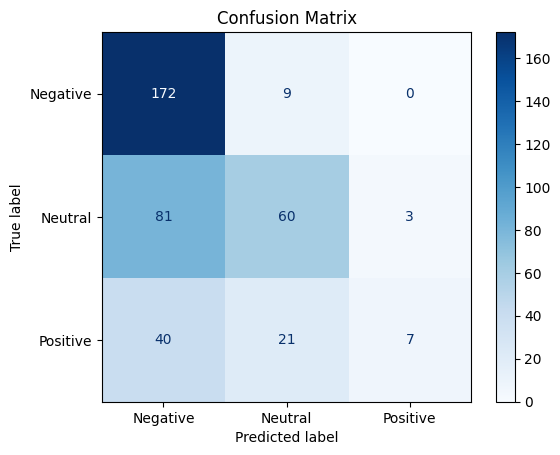

In [14]:
# Library : from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Menghitung confusion matrix
# Confusion matrix menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas
# Parameter 'labels' memastikan urutan label sesuai dengan kelas: 'Negative', 'Neutral', dan 'Positive'
cm = confusion_matrix(y_test, y_pred, labels=['Negative', 'Neutral', 'Positive'])

# Membuat visualisasi confusion matrix
# ConfusionMatrixDisplay digunakan untuk menampilkan confusion matrix dalam bentuk grafik
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral', 'Positive'])

# Menampilkan confusion matrix dengan skema warna biru
disp.plot(cmap=plt.cm.Blues)

# Menambahkan judul pada grafik confusion matrix
plt.title('Confusion Matrix')

# Menampilkan grafik confusion matrix
plt.show()

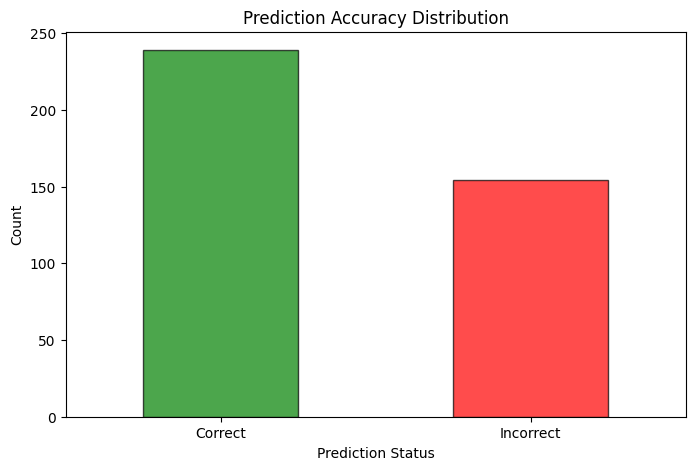

In [15]:
# Menambahkan hasil prediksi ke dalam data testing
results = pd.DataFrame({
    'Post': X_test.reset_index(drop=True),  # Teks asli dari data testing
    'True Sentiment': y_test.values,        # Sentimen asli (label ground truth)
    'Predicted Sentiment': y_pred           # Sentimen yang diprediksi oleh model
})

# Menambahkan kolom 'Difference' untuk menunjukkan kesalahan prediksi
# Jika 'True Sentiment' sama dengan 'Predicted Sentiment', maka 'Correct'
# Jika berbeda, maka 'Incorrect'
results['Difference'] = results.apply(
    lambda row: 'Correct' if row['True Sentiment'] == row['Predicted Sentiment'] else 'Incorrect', axis=1
)

# Membuat grafik distribusi kesalahan prediksi
# Menghitung jumlah prediksi benar dan salah
error_distribution = results['Difference'].value_counts()

# Visualisasi distribusi perbedaan
plt.figure(figsize=(8, 5))
error_distribution.plot(
    kind='bar',
    color=['green', 'red'],
    alpha=0.7,
    edgecolor='black'
)

# Menambahkan judul dan label sumbu
plt.title('Prediction Accuracy Distribution')
plt.xlabel('Prediction Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Membuat label tetap horizontal

# Menampilkan grafik
plt.show()

In [16]:
# Menampilkan DataFrame lengkap dengan informasi tambahan
results_with_difference = pd.DataFrame({
    'Original Text': X_test.reset_index(drop=True),  # Teks asli dari data testing
    'True Sentiment': y_test.values,                # Sentimen asli (label ground truth)
    'Predicted Sentiment': y_pred,                  # Sentimen hasil prediksi
    'Prediction Status': results['Difference']      # Status prediksi (Correct/Incorrect)
})

# Menampilkan 5 baris pertama untuk ditinjau
print("\nDataFrame with Prediction Status:\n")
results_with_difference.head()


DataFrame with Prediction Status:



,Original Text,True Sentiment,Predicted Sentiment,Prediction Status
0,bodo,Negative,Negative,Correct
1,jago pidato kandangnya hadapan pendukungnya ma...,Neutral,Negative,Incorrect
2,mak cina,Neutral,Negative,Incorrect
3,manusia bodoh cem nasbung,Neutral,Negative,Incorrect
4,mca bodoh,Negative,Negative,Correct


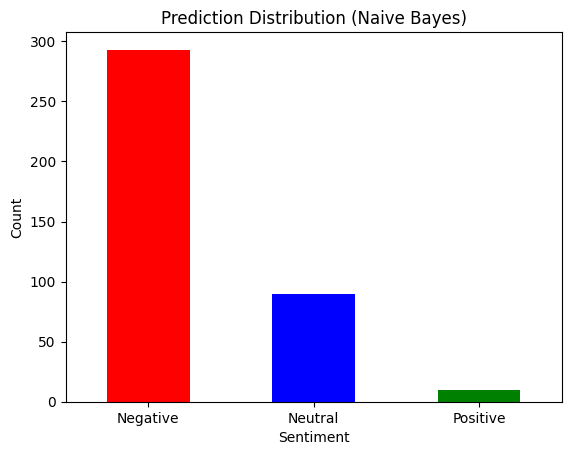

In [17]:
# Menambahkan hasil prediksi ke dalam data testing
# Dimulai dengan membuat salinan dari data teks (X_test)
results = X_test.copy()

# Mengatur ulang indeks agar konsisten dengan prediksi dan label asli
results = results.reset_index(drop=True)

# Membuat DataFrame baru untuk menyimpan data asli (Post), label sebenarnya (True Sentiment),
# dan label prediksi (Predicted Sentiment)
results = pd.DataFrame({
    'Post': results,                       # Teks asli dari data testing
    'True Sentiment': y_test.values,       # Sentimen asli (label ground truth)
    'Predicted Sentiment': y_pred          # Sentimen yang diprediksi oleh model
})

# Membuat visualisasi distribusi prediksi
# Menghitung jumlah prediksi untuk setiap kategori sentimen (Negative, Neutral, Positive)
results['Predicted Sentiment'].value_counts().plot(
    kind='bar',                            # Jenis grafik: bar chart
    color=['red', 'blue', 'green']         # Warna untuk setiap bar
)

# Menambahkan judul dan label untuk grafik
plt.title('Prediction Distribution (Naive Bayes)')
plt.xlabel('Sentiment')                    # Label untuk sumbu X
plt.ylabel('Count')                        # Label untuk sumbu Y
plt.xticks(rotation=0)                     # Menjaga label pada sumbu X tetap horizontal

# Menampilkan grafik
plt.show()